In [1]:
import pandas as pd
import numpy as np

In [3]:
wine_data = pd.read_csv('data/winequality-white.csv', names=[
    'Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar',
    'Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density',
    'pH', 'Sulphates', 'Alcohol', 'Quality'], skiprows=1, sep=r'\s*;\s*', engine='python')
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


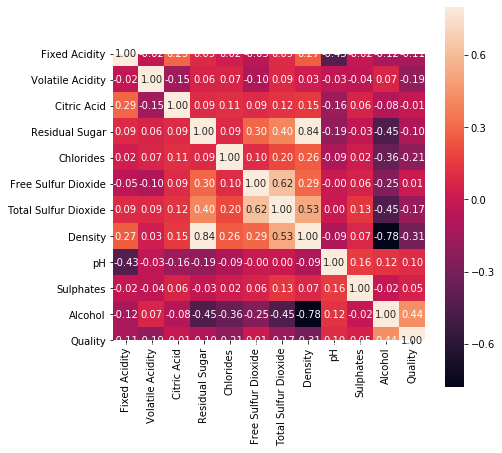

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()

In [7]:
x = wine_data.drop('Quality', axis=1)
y = wine_data['Quality']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5, max_features=4, criterion='entropy')
classifier

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
score = classifier.score(X_test, y_test)
print(score)

0.5


In [46]:
classifier.n_features_

11

In [47]:
classifier.feature_importances_

array([0.        , 0.18897338, 0.        , 0.05880835, 0.02859393,
       0.06256576, 0.07357305, 0.34551809, 0.00921426, 0.03100139,
       0.2017518 ])

In [48]:
import sklearn.tree as tree
tree.export_graphviz(classifier, out_file='tree.dot', feature_names=x.columns)

In [49]:
from subprocess import call
call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

0